# Part I: Create standard graphs with Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Histogram

Histograms are a type of graph used to represent the distribution of numerical data. To create a histogram, you first need to divide the range of the data into a set of intervals, also called "bins." Each bin represents a range of values in the data set, and the height of the bin represents the frequency of the data that falls within that range.


For example, take this histogram showing the heights of a group of people. To create this graph, we divided the range of heights in our dataset into bins of equal width, in this case every 5 centimeters. The first bin represents heights between 160 and 165 centimeters, the second bin represents heights between 165 and 170 centimeters, and so on. Then, we counted the number of people in our dataset that fell into each bin and plotted that frequency as the height of the bin.

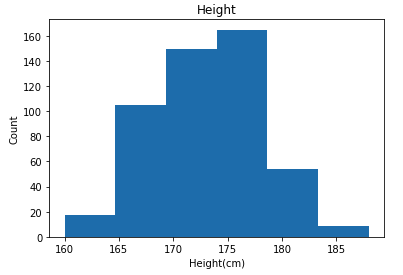

Imagine you are head of staff at a large community health clinic and have received results of a patient satisfaction survey that suggests that your clinic might have a problem with long wait times. Patients report that they wait about 10 minutes to see the doctor after being placed in the examination room. Your  electronic medical record (EMR) system keeps track of these times: the nurse timestamps the patient's medical record when they leave the room, and the doctor timestamps the patient's medical record when they open it to review with the patient. The export from the EMR system of the wait time data is stored as `wait-times.csv`. 

You want to focus your next staff meeting on understanding these results and brainstorming actions to take. Since you have both the survey and the EMR data, a good place to start is to see if they are consistent with each other. 

- If they are consistent, then you might frame a discussion for the staff meeting around what to do to decrease wait times. 

- If they aren't consistent, then you might focus the staff meeting around why patients are experiencing wait times as longer than they are and what to do to help. For example, you might add a system that displays where patients are in the queue. In addition,  the staff could come up with all sorts of creative solutions to try. These are the types of exciting discussions you can have with data to inform your decision making!

Let's import our wait time data: 

In [2]:
# read CSV file into DataFrame
wait_times = pd.read_csv("../datasets/wait-times.csv")

# display the first five rows
wait_times.head()

,time_sec
0,203.0
1,200.0
2,262.0
3,279.0
4,261.0


We'll get started by exploring our data using a histogram to get a better sense of the data. To make the histogram, we use the `hist()` method: 

`plt.hist(df_name["variable_name"])`   

So for our `wait_times` data: 

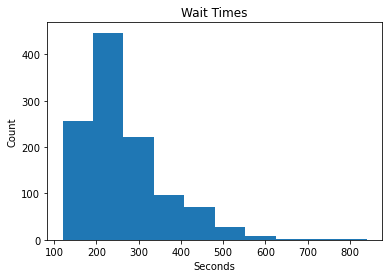

In [3]:
# create histogram plot
plt.hist(wait_times['time_sec'])

# label x-axis
plt.xlabel('Seconds')

# label y-axis
plt.ylabel('Count')

# title plot
plt.title('Wait Times')

# display figure
plt.show()

For your staff meeting presentation, you want to use visualizations that are easily and quickly understandable. And while this graph is correct, it isn't terribly easy to read. There are two quick things we can do to improve this. 

1. People can more easily think about wait times in minutes than seconds, so let's convert those seconds to minutes by using our familiar procedure of adding a column `'time_min'` to `wait_times` like we did in Module 2.

In [7]:
# add new column
wait_times['time_min']= wait_times['time_sec']/60

# display first 5 rows of df to check
wait_times.head()
   

,time_sec,time_min
0,203.0,3.383333
1,200.0,3.333333
2,262.0,4.366667
3,279.0,4.650000
4,261.0,4.350000


2. Notice how we have values spanning the tick marks in our first visualization. This is because matplotlib automatically chooses the number of bins by default. Often you'll want to modify the number of bins for appearance or to demonstrate the values in greater detail. The `hist()` method's `bins` parameter lets us specify the number of bins to use like this:

`plt.hist(df_name["variable_name"], bins=number_of_bins)`   

To choose the number of bins for this visualization, we look can get summary statistics using the `describe()` method:

In [8]:
# get data summary
wait_times['time_min'].describe()

count    1132.000000
mean        4.304594
std         1.666325
min         2.000000
25%         3.216667
50%         3.533333
75%         5.166667
max        14.000000
Name: time_min, dtype: float64

We'll  use the minimum value (2 minutes) and maximum value (14 minutes) to calculate the range (14 - 2 = 12 minutes). Since our data covers a 12-minute span of time, we'll choose 12 bins (one for each minute) to make a histogram that depicts a good representation of the data to present to the staff:

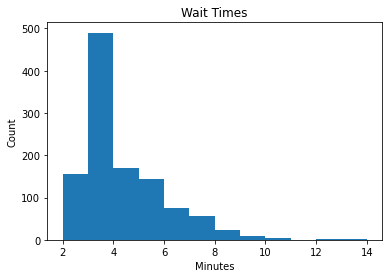

In [9]:
# create histogram with 12 bins
plt.hist(wait_times['time_min'], bins=12)

# label x-axis
plt.xlabel('Minutes')

# label y-axis
plt.ylabel('Count')

# title plot
plt.title('Wait Times')

# display figure
plt.show()


Looking at the histogram, we see that the bulk of the wait times are between 2-6 minutes, which suggests an inconsistency with the reported average 10 minute wait time from the survey . As we saw when we used the `describe()` method earlier, the EMR data shows an average wait time of 4 1/2 minutes. This is a lot lower than the 10 min patients reported on the survey. So now, armed with easily digestible visualizations, you're ready for the staff meeting!


#### Exercises: 

#### Exercise 1

The EHR system also logs the amount of time patients actually spend with the doctor. These data are exported from the system in a file called `office_times.csv` . Make a histogram showing the distribution of doctor's visit times with time in seconds. 

In [11]:
#student code 

# read the CSV file into a DataFrame 

# create histogram 

# label x-axis 

# label y-axis 

# title plot 

# display figure 

#### Exercise 2

Now you'll make that graph more helpful for the staff. First, add a new variable office_times['time_min']. Next, make a histogram showing the distribution of doctor's visit times with time in minutes (office_times['time_min']). Use the number of bins needed such that each bin contains a span of five minutes, e.g., one bin is 5-10 minutes, the next is 10-15, etc. 

In [15]:
# student code 

# convert data from seconds into minutes 

# create histogram with 5 bins 

# label x-axis 

# label y-axis 

# title plot       

# display figure 


### Part 2: Box Plot

Imagine you have a set of numbers, for example, the ages of 30 people in a college course. A box plot is a way to show how those ages are spread out, and what the most common age range is.

As you can see in our box plot "Distribution of Ages in a College Class", a box plot looks like a rectangular box with lines sticking out of it. The box represents the middle 50% of the ages(20-23). The line in the middle of the box is the median age (21) - this means that half of the people in the course are older than the median age, and half are younger.

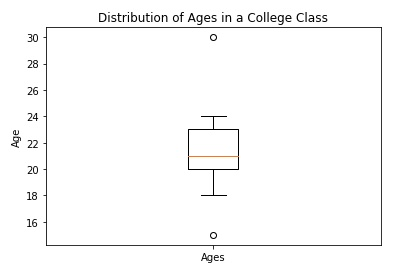

The lines sticking out of the box are called whiskers. They show how far away the ages are from the middle 50%. Any ages that are further away from the box than the whiskers are called outliers - this means that they are much older or much younger than most people in the room. For example, the two circles on the graph represent the student who is 15 and the student who is 30.  

So let's build a box plot. Imagine you are a secondary calculus teacher. You've started an after-school tutoring program and you want to see how well it's working. So you give a standardized test to two calculus classes; one received the tutoring while the other did not. 

Class 1 only attends regular class, while every student in Class 2 does after-school tutoring in addition to regular class. The completed test results are given in this dataset: 

In [ ]:
# read CSV file into DataFrame
exam_data = pd.read_csv("../datasets/exam-data.csv")

# display the first five rows
exam_data.head()

Box plots are great for comparing sets of data. To visualize the differences between the two classes on the test, we will use the `boxplot()` method. To create a boxplot for one variable, we would use: 

`plt.boxplot(dataframe_name["variable_name"])`

To compare 2 distributions of data, we need to use an array:

`plt.boxplot([dataframe_name['variable_name'], dataframe_name['variable_name']])`

Now, we run the following code to create the visualization that shows the score distributions of the two classes:

In [ ]:
# labels for x-axis ticks
list_of_xvalues = [1, 2]
list_of_xlabels = ["Class 1", "Class 2"]

# create box plot from array
plt.boxplot([exam_data['class1'], exam_data['class2']])

# modify the values of the ticks
plt.xticks(list_of_xvalues, list_of_xlabels)

# label y-axis
plt.ylabel("Score")

# title plot
plt.title("Test Scores Distribution Comparison")

# display figure
plt.show()

The visualization suggests that the students who participated in after-school tutoring scored higher than the students who didn't participate.

#### Exercises:

#### Exercise 1

Make a box plot of the `time_sec` variable in the `wait_times` DataFrame from the histogram section. What differences do you notice in the two representations of the same dataset?

In [ ]:
# student code here

# assign visualization data

# labels for x-axis ticks

# create box plot

# modify the values of the ticks

# label y-axis

# display figure


### Part 3: Pie Chart


A pie chart is a circular graph used to represent the relative proportions of different categories in a data set. The whole circle represents the total amount or 100%, and each category is represented by a slice of the pie. The size of each slice is proportional to the value or percentage of the data that falls within that category.

For example, consider a survey of 100 people asking them to identify their favorite type of fruit. The data shows that 40 people prefer apples, 30 people prefer bananas, and 30 people prefer oranges. To create a pie chart from this data, we would draw a circle and divide it into three slices, one for each fruit. The size of each slice would be proportional to the number of people who chose that fruit. In this case, the slice representing apples would be the largest, accounting for 40% of the total, while the slices for bananas and oranges would be smaller, each accounting for 30% of the total (See Favorite Fruits graph).


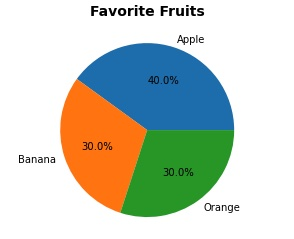

As the manager of a used car dealership, it is important to know which car makes sell best for your customers. Your data analysts took last year's sales data and calculated the percentage of cars that resold within 3 months for each of the primary car makes that your dealership sells. So let's start by importing `used-car-makes-sold.csv` as the DataFrame `used_car_makes_sold`.

In [ ]:
# read CSV file into DataFrame
used_car_makes_sold = pd.read_csv("../datasets/used-car-makes-sold.csv")
                                   
# display the first five rows
used_car_makes_sold.head()

You want to create a graph to generate discussion about the data in a sales meeting, and since the data are about chunks of the “cars sold pie”, you think a pie chart will be the best visualization. To generate the chart, we give the `pie()` method the DataFrame column which contains the percentages:  

`plt.pie(dataframe_name["variable_name"])`

In [ ]:
# create pie chart
plt.pie(used_car_makes_sold['percentage_sold'])

# title plot
plt.title('Percentage of Cars Sold')

# display figure
plt.show()

This pie chart wouldn't do much to help your team because it doesn't tell you which car make each slice of the pie represents. Matplotlib does not automatically assign labels to each slice by default. Fortunately, `pie()` takes a parameter, `labels`,  which takes the DataFrame column that specifies the labels for each wedge. To set the labels:

`plt.pie(dataframe_name["variable_name"], labels = dataframe_name["variable_name"])`  

So, let's add the labels to our pie chart:

In [ ]:
# create pie chart
plt.pie(used_car_makes_sold['percentage_sold'], labels = used_car_makes_sold['make'])

# title plot
plt.title('Percentage of Cars Sold')

# display figure
plt.show()

Now imagine being part of the sales team, seeing that pie chart, and asking the question, which make is the biggest seller? It is tough to tell; we can definitively say that Toyota and Nissan make up the largest portion, but which is the largest? 

Matplotlib does not automatically include the percentage on each slice on the graph, and it can help clarify the graph. The `pie()` method takes a parameter, `autopct`, which takes a format string for displaying the percentage value for each slice up to N significant digits:  

`plt.pie(dataframe_name["variable_name"], autopct='%.Nf'%%’)`  

Let's finish up our graph for the sales team by including the percentage values: 

In [ ]:
# create pie chart
plt.pie(used_car_makes_sold['percentage_sold'], labels=used_car_makes_sold['make'], autopct='%.1f%%')

# title plot
plt.title('Percentage of Cars Sold')

# display figure
plt.show()

#### Exercises:

#### Exercise 1

Create a pie chart that shows the percentage of the total cars the dealership has in stock for each make of vehicle. Use the `used-car-makes-stock.csv` dataset. Make sure to include labels and percentage values.

In [ ]:
# student code

# read CSV file into DataFrame 

# create pie chart 

# title pie chart

# display figure 


### Part 4:	Scatter Plot

A scatter plot is a type of graph used to display the relationship between two continuous variables. Each point on the graph represents a pair of values for the two variables being plotted, and the position of the point is determined by the value of the two variables.

For example, suppose you want to analyze the relationship between students’ exam scores and the amount of time they studied. You can create a scatter plot by plotting each student's exam score on the y-axis and the number of hours they studied on the x-axis, see "Grades by Study Time". Each point on the graph represents a student, with the x-coordinate indicating the number of hours studied and the y-coordinate indicating the exam score. By analyzing the scatter plot, you can determine if there is a relationship between the two variables and if so, the direction and strength of the relationship. In this case, the points on the scatter plot form a roughly straight line going upwards from left to right. This indicates a <i> positive correlation</i>, meaning that higher values of one variable are associated with higher values of the other variable. In other words, the more you study, the better grade you get.

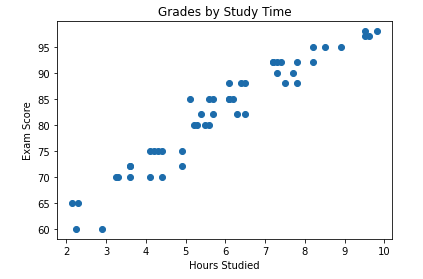

On the other hand, if the points form a roughly straight line going downwards from left to right, this indicates a negative correlation, meaning that higher values of one variable tend to be associated with lower values of the other variable. For example, "Exercise and BMI" shows a negative correlation between the number of hours people exercise per week and their BMI (body mass index). 

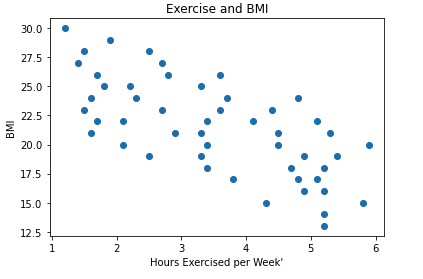

Finally, if there is no clear pattern or relationship between the variables, they are said to be uncorrelated. For example, no matter how much I would love to believe it does, drinking coffee does not make you smarter. In "Coffee Consumption and IQ", we can see that there is no visible trend: Higher values of daily coffee consumption are not associated with higher or lower values of IQ.  


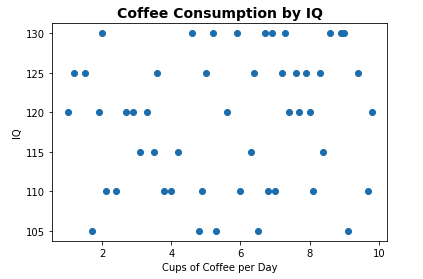

So let's make a scatter plot already, you say?

As a small ice cream shop owner, it's important to be careful in your inventory planning. You think hotter months have higher ice cream cone sales than colder ones. To check out your guess, you create a dataset of daily temperatures for a randomly selected set of days over the past year and the number of ice cream cones sold on those days.

Let's import that dataset:

In [14]:
# read CSV file into DataFrame
ice_cream_cone_sales = pd.read_csv("../datasets/ice-cream-sales.csv")
                                   
# display the first five rows
ice_cream_cone_sales.head()

,temperature,sold
0,85,313
1,93,408
2,96,432
3,90,309
4,83,301


As a next step in your investigation, you'll create a scatterplot with temperature on the x-axis and the number of ice cream cones sold on the y-axis to examine the relationship between these two variables.

To create a scatterplot in matplotlib, we use:

`plt.scatter(dataframe_name["x_variable_name"],dataframe_name["y_variable_name"])`

There are two important things to keep in mind with scatterplots. Both variables should be numbers so that they can be plotted on the horizontal (x-axis) and vertical (y-axis) axes of the graph. In addition, the data should be paired, so each x value should have a y value and vice versa. In other words, you need to have the same number of x and y values.

To create the scatterplot for our ice cream cone sales:
 

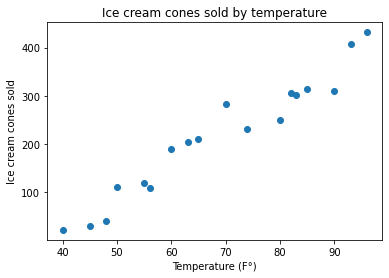

In [17]:
# create scatter plot
plt.scatter(ice_cream_cone_sales['temperature'], ice_cream_cone_sales['sold'])


# label x-axis
plt.xlabel("Temperature (F°)")

# label y-axis
plt.ylabel("Ice cream cones sold")

# title plot
plt.title("Ice cream cones sold by temperature")

# display figure
plt.show()

### Multiple Choice Question 

- Take a look at the graph. Was your guess correct? In other words are temperature and ice cream sales positively correlated, negatively correlated or uncorrelated?

- Feedback "Temperature and ice cream sales are positively correlated because the points on the scatter plot form a roughly straight line going upwards from left to right."


Now we've confirmed our guess that as the temperature rises outside, the amount of ice cream cones we sell will also increase. However, we wanted to use that relationship to help us predict how much inventory we should have on hand based on temperature. Adding a line of best fit to the scatterplot can do that.

To find the line of best fit, you would draw a straight line through the data points in such a way that the distance between the line and each data point is as small as possible. Using this line, you can get a prediction for the number of ice cream cones you will sell based on the temperature, See "Ice cream cones sold by temperature (with line of best fit)". In other words, the line of best fit is like an average of the data points.


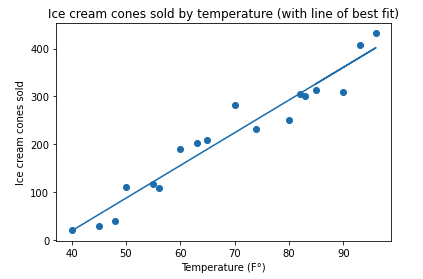

Imagine you find out that for the first week next month, temperatures will be between 60-70 degrees F. Looking at our line of best fit, we can predict that at that temperature range, we can expect to sell between approximately 150-200 ice cream cones per day.

Let's look at how to use the NumPy `polyfit()` method to add a "line of best fit" to a scatterplot:

- First you create the scatterplot. You make your life much easier if you assign the appropriate data to the variables `x` and `y` first because we’re going to use them several times:

`x = dataframe_name['x_variable_name']`

`y = dataframe_name['y_variable_name']`

`plt.scatter(x, y)`
- Next, to generate coefficients for line of best fit(`a` and `b` below), `np.polyfit()` takes your data points and the "degree" of the line you want to fit (e.g., 1 for a straight line).

`a, b = np.polyfit(x, y, 1)`

- Finally, using your coefficients `a` and `b`, you plot the line of best fit over the scatterplot using the familiar `plot()` function from matplotlib. You create the line using the standard equation for a line,  `y = a*x + b`.

`plt.plot(x, a*x+b)`

Here’s how you build our “Ice cream cones sold by temperature (with line of best fit)" graph:

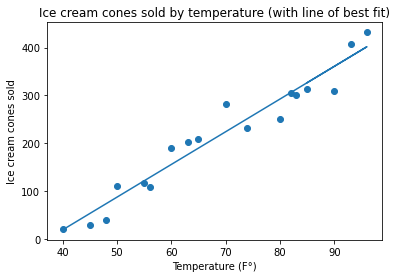

In [27]:
# Assign x data to the variable x and y data to the variable y to make the coding simpler
x = ice_cream_cone_sales['temperature']
y = ice_cream_cone_sales['sold']

# create scatter plot
plt.scatter(x, y)

# generate coefficients for line of best fit
a, b = np.polyfit(x, y, 1)

# create line plot of line of best fit
plt.plot(x, a*x+b)

# label x-axis
plt.xlabel("Temperature (F°)")

# label y-axis
plt.ylabel("Ice cream cones sold")

# title plot
plt.title("Ice cream cones sold by temperature (with line of best fit)")

# display figure
plt.show()

#### Exercises:

#### Exercise 1

Using the `hot-chocolate-sales.csv`, create a scatterplot with the `temperature` column as the x-axis and `sales` column as the y-axis.

In [ ]:
# student code goes here

# read CSV file into DataFrame
                                   
# assign x,y data for visualization

# create scatter plot

# label x-axis

# label y-axis

# title plot

# display figure


#### Exercise 2

Add a line of best fit to the scatterplot from Exercise 1.

In [ ]:
# student code goes here

# assign data for visualization

# create scatter plot

# generate coefficients for line of best fit

# create line plot of line of best fit

# label x-axis

# label y-axis

# title plot

# display figure
